### import dependencies  
We provided the packages we had used, you can import your prefered package but be aware of version conflict.

In [1]:
#import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot

check weither your code run with GPUs or not

In [ ]:
tf.config.list_physical_devices('GPU')

mount your colab to your Google Drive that you can download your file to solid space rather than temporary space

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

```cd``` stands for change directory, common bash command that you should learn

In [ ]:
cd gdrive/MyDrive/# TODO

You can download ```
Prob2_epoch_100.h5``` and ```
training.csv``` through below code, or just download from NTU COOL.

In [2]:
!gdown --id '10rpyNdrJIBQUHqH8ftLhkzOZiQwuGrGU' --output Prob2_epoch_100.h5
!gdown --id '101Q5ayiYEoKiSxpZ-M7ZMdhhmW-hLanG' --output training.csv

Downloading...
From: https://drive.google.com/uc?id=10rpyNdrJIBQUHqH8ftLhkzOZiQwuGrGU
To: /content/epoch_100.h5
100% 3.84M/3.84M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=101Q5ayiYEoKiSxpZ-M7ZMdhhmW-hLanG
To: /content/training.csv
100% 8.01k/8.01k [00:00<00:00, 15.3MB/s]


### Data preprocessing

In [2]:
# download and split the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("training data = ", x_train.shape)
print("testing data = ", x_test.shape)

# standarize your data
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

# encoding your label
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )

# apply the data augmentation on the training set
datagen.fit(x_train)

training data =  (50000, 32, 32, 3)
testing data =  (10000, 32, 32, 3)


### Resuming training  
As problem description said, there're lots of reason can cause your training accidently be interupted. You should learn how to reload TA's model and continue training. You should also learn how to save your model when training.



In [3]:
# load TA's model
model = tf.keras.models.load_model('Prob2_epoch_100.h5') # TODO

import os
batch_size = 128
epochs=100

# some pacakge and code should be imported and executed here
# TODO

optimizer = tf.optimizers.Adam(learning_rate=0.0005,decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# tensorflow execute model.fit to start training, below code can start training but can't save your model and learning log while training.
# TODO (revision of below function)
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), 
                    steps_per_epoch=x_train.shape[0] // batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(x_test,y_test))

Epoch 1/100
390/390 [==============================] - 23s 34ms/step - loss: 0.4317 - accuracy: 0.8814 - val_loss: 0.5025 - val_accuracy: 0.8749
Epoch 2/100
390/390 [==============================] - 12s 31ms/step - loss: 0.4271 - accuracy: 0.8835 - val_loss: 0.4837 - val_accuracy: 0.8734
Epoch 3/100
390/390 [==============================] - 13s 32ms/step - loss: 0.4333 - accuracy: 0.8816 - val_loss: 0.5140 - val_accuracy: 0.8713
Epoch 4/100
390/390 [==============================] - 13s 33ms/step - loss: 0.4300 - accuracy: 0.8824 - val_loss: 0.4744 - val_accuracy: 0.8786
Epoch 5/100
390/390 [==============================] - 13s 33ms/step - loss: 0.4299 - accuracy: 0.8836 - val_loss: 0.5126 - val_accuracy: 0.8690
Epoch 6/100
390/390 [==============================] - 13s 33ms/step - loss: 0.4327 - accuracy: 0.8829 - val_loss: 0.4846 - val_accuracy: 0.8755
Epoch 7/100
390/390 [==============================] - 13s 33ms/step - loss: 0.4317 - accuracy: 0.8836 - val_loss: 0.4792 - val_ac

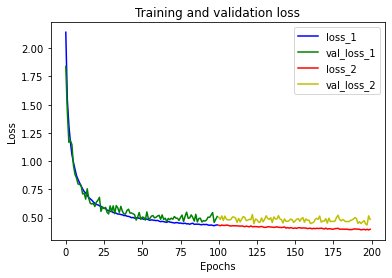

In [38]:
#%%plot the figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#read data input 1-100 epochs
train = pd.read_csv('training.csv',sep = ",")

#define the curve
acc_1 = train['accuracy']
val_acc_1 = train['val_accuracy']
loss_1 = train['loss']
val_loss_1 = train['val_loss']
epochs = train['epoch']

acc_2 = history.history['accuracy']
val_acc_2 = history.history['val_accuracy']
loss_2 = history.history['loss']
val_loss_2 = history.history['val_loss']

epochs_2 = range(100,200)

plt.plot(epochs, loss_1, 'b', label='loss_1')
plt.plot(epochs, val_loss_1, 'g', label='val_loss_1')
plt.plot(epochs_2, loss_2, 'r', label='loss_2')
plt.plot(epochs_2, val_loss_2, 'y', label='val_loss_2')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('problem2_2_loss.png')
plt.show()

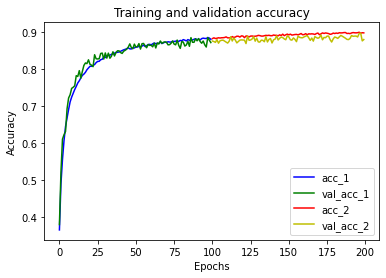

In [39]:
plt.plot(epochs, acc_1, 'b', label='acc_1')
plt.plot(epochs, val_acc_1, 'g', label='val_acc_1')
plt.plot(epochs_2, acc_2, 'r', label='acc_2')
plt.plot(epochs_2, val_acc_2, 'y', label='val_acc_2')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('problem2_2_acc.png')
plt.show()